# Books of the Year (2022)

For the past year I've been keeping a spreadsheet of all the books I have read (including audiobooks). I had no plan for this record other than being able to remember what I had read. However, I am curious if there are any insights I can glean from this data that I otherwise might not have considered. Either way, it is an opportunity to practice cleaning and analyzing data using [pandas](https://pandas.pydata.org/). Had I intended to use this dataset for later analysis, I might have set it up differently. Why did have two genre columns? Will that be useful or not? I can immediately see some things that will be tricky, such as the Author(s) column, which has multiple comma-separated values in at least one row. 

## Setup

Step 1: import pandas.

In [278]:
import pandas as pd

Step 2: read the csv file and display the table.

In [279]:
books = pd.read_csv('books.csv')
books

,Title,Author(s),Finished,Publication Year,Original Language,Format,Genre 1,Genre 2,Subject(s)
0,Say What You Mean,Oren J. Sofer,Y,2018,English,Book,Nonfiction,Communication,NaN
1,A Billion Voices,David Moser,Y,2016,English,Book,Nonfiction,History,"Language, China"
2,Think Again,Adam Grant,Y,2021,English,Audiobook (Overdrive),Nonfiction,Psychology,NaN
3,Bewilderment,Richard Powers,Y,2021,English,Audiobook (Overdrive),Fiction,Sci-Fi,NaN
4,Wildland,Evan Osnos,Y,20921,English,Audiobook (Overdrive),Nonfiction,History,NaN
5,The Witches Are Coming,Lindy West,Y,2019,English,Audiobook (Overdrive),Nonfiction,Essays,NaN
6,Persepolis,Marjane Satrapi,Y,2000,French,Book,Nonfiction,Graphic Novel,Iran
7,The Circle,Dave Eggers,Y,2013,English,Audiobook (Overdrive),Fiction,Novel,Technology
8,A Tale for the Time Being,Ruth Ozeki,Y,2013,English,Audiobook (Hoopla),Fiction,Novel,"Japan, Time"
9,Arab of the Future Part 2,Riad Satouf,Y,2015,French,Book,Nonfiction,Graphic Novel,"Syria, France"


The indexes are all mixed up because they were set when the file was imported. I'll leave them for now.

## Cleaning

Step 1: Find and remove duplicates.

From a quick glance, it looks like I have at least one duplicated entry. To make sure there aren't any others, I'll run the duplicated method only on the Title column (in case the values in the other columns, such as Genre, are not exactly the same).

In [280]:
books["Title"].duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22     True
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
Name: Title, dtype: bool

This confirms what I already saw, which is that I had entered "Underland" twice (the second occurance of the value is labeled True). It so happens that the version at index 24 has an incorrect spelling of the author's name, so I'll drop that one. Instead of using the drop_duplicates method, I'll specify the row that I want to delete:

In [281]:
books.drop(labels=24, axis=0)

,Title,Author(s),Finished,Publication Year,Original Language,Format,Genre 1,Genre 2,Subject(s)
0,Say What You Mean,Oren J. Sofer,Y,2018,English,Book,Nonfiction,Communication,NaN
1,A Billion Voices,David Moser,Y,2016,English,Book,Nonfiction,History,"Language, China"
2,Think Again,Adam Grant,Y,2021,English,Audiobook (Overdrive),Nonfiction,Psychology,NaN
3,Bewilderment,Richard Powers,Y,2021,English,Audiobook (Overdrive),Fiction,Sci-Fi,NaN
4,Wildland,Evan Osnos,Y,20921,English,Audiobook (Overdrive),Nonfiction,History,NaN
5,The Witches Are Coming,Lindy West,Y,2019,English,Audiobook (Overdrive),Nonfiction,Essays,NaN
6,Persepolis,Marjane Satrapi,Y,2000,French,Book,Nonfiction,Graphic Novel,Iran
7,The Circle,Dave Eggers,Y,2013,English,Audiobook (Overdrive),Fiction,Novel,Technology
8,A Tale for the Time Being,Ruth Ozeki,Y,2013,English,Audiobook (Hoopla),Fiction,Novel,"Japan, Time"
9,Arab of the Future Part 2,Riad Satouf,Y,2015,French,Book,Nonfiction,Graphic Novel,"Syria, France"


Step 2: Deal with null values.

Another thing I've noticed is that there are some null values in the Finished column, which could mean that I forgot to update the spreadsheet at some point, or that I gave up reading or am still reading a book. For simplicity, I'll make then all N for No.

In [282]:
books['Finished'].fillna('N',inplace=True)

Step 3: Get rid of the Audiobook platforms (Hoopla, Overdrive) to simplify that Format values. I'm assuming that I've spelled everything correctly, because with any typos the following method would not work...

In [283]:
books['Format'] = books['Format'].replace(['Audiobook (Overdrive)', 'Audiobook (Hoopla)'], 'Audiobook')
print(books['Format'])

0          Book
1          Book
2     Audiobook
3     Audiobook
4     Audiobook
5     Audiobook
6          Book
7     Audiobook
8     Audiobook
9          Book
10    Audiobook
11    Audiobook
12         Book
13    Audiobook
14         Book
15    Audiobook
16    Audiobook
17    Audiobook
18    Audiobook
19    Audiobook
20    Audiobook
21    Audiobook
22    Audiobook
23    Audiobook
24         Book
25    Audiobook
26    Audiobook
27    Audiobook
28    Audiobook
29    Audiobook
30    Audiobook
31    Audiobook
32    Audiobook
33         Book
34         Book
35         Book
36         Book
37    Audiobook
38    Audiobook
39         Book
40    Audiobook
41         Book
42    Audiobook
Name: Format, dtype: object


Step 4: Fix errors.
I noticed (when trying to find the mean) that the Publication Year column has a typo. One of the values has 5 digits, which can't be right. I'm assuming that 20921 is supposed to be 2021.

In [295]:
books = books.replace(20921,2021)

## What the data can tell me
### How many books did I finish?
The most obvious is thing is the number of books I finished, which I could easily count, but will let pandas do for me:

In [296]:
finished = books['Finished'].value_counts()['Y']
print("Total books finished: " + str(finished))

Total books finished: 29


29 - higher than I would have expected, probably because so many were audiobooks that I consumed while doing other things.
### How many books per week did I read?

This is some basic math: dividing the total number of books finished by the number of weeks in a year (52):

In [297]:
books_per_week = finished/52
print("Average books per week: " + str(books_per_week.round(1)))

Average books per week: 0.6


That amounts to approxiately 0.6 books per week. Considering that there are still a few weeks left in December, and that I know I am close to finishing a couple of the books on the list, that number might be a little higher, but not by much. 

### What was the precentage of physical book vs audiobook?

First, I will count the total number of each format (Book and Audiobook). If I try to count those values, however, I'll run into an issue: I will also be counting unfinished book formats. To get around that, I will need to first filter out books without a Y in the Finished column:

In [298]:
books_finished = books[books['Finished'] == 'Y']

pbook = books_finished['Format'].value_counts()['Book']
pbook_percent = pbook/finished
abook = books_finished['Format'].value_counts()['Audiobook']
abook_percent = abook/finished

print("Physical books: " + str(pbook))
print("Percent of total finished books: " + str(pbook_percent.round(2)) + "%")
print("Audiobooks: " + str(abook))
print("Percent of total finished books: " + str(abook_percent.round(2)) + "%")


Physical books: 7
Percent of total finished books: 0.24%
Audiobooks: 22
Percent of total finished books: 0.76%


### What were the most common genres?
For consistency, I'm still looking only at finished books here. To start with, I will find the breakdown for Genre 1, which is either Fiction or Nonfiction. After that I will generate a simple pie chart to show the difference clearly.

In [299]:
genre_counts = books_finished['Genre 1'].value_counts()
print(genre_counts)

Nonfiction    18
Fiction       11
Name: Genre 1, dtype: int64


<AxesSubplot: ylabel='Genres'>

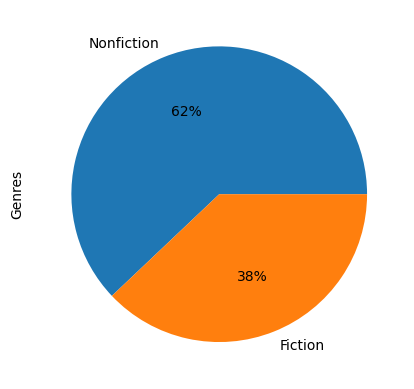

In [300]:
from matplotlib import pyplot as plt
genre_counts.plot(kind='pie', ylabel="Genres", autopct='%1.0f%%')

Now I'll look at the Genre 2 column, which you might call the subgenre. This way of categorizing books is very squishy, and many of these titles could have been labeled differently. The category Novel is not great, but I used it for what might be called "Literary Fiction" or "Serious Fiction", as opposed to something that is clearly in another category, such as Sci-Fi. Instead of a pie chart, I'll try a bar chart.

In [301]:
genre2_counts = books_finished['Genre 2'].value_counts()
print(genre2_counts)

Novel            5
Sci-Fi           4
Psychology       3
Graphic Novel    3
Memoir           3
History          2
Nature           2
Self-help        2
Communication    1
Essays           1
Criticism        1
Thriller         1
Self-Help        1
Name: Genre 2, dtype: int64


<AxesSubplot: xlabel='Sub-Genre', ylabel='Number of books'>

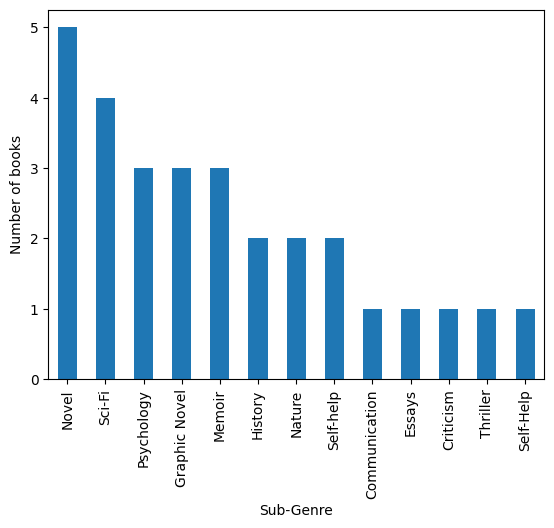

In [372]:
genre2_counts.plot(kind='bar',xlabel='Sub-Genre', ylabel='Number of books')

So, there is something interesting going on here. The breakdown of Genre 1 shows 62% Nonfiction, but the Genre 2 data shows the highest numbers in Novel and Sci-Fi (Fiction). What this must mean is that the Nonfiction books are spread across more subgenres (Psychology, History, Nature, etc.). This may just be a result of my lazy labeling system.

### Did I read mostly old books or newer books?
The first thing I'll do is find the mean, mode, and median for the Publication Year column:

In [369]:
mean = books_finished['Publication Year'].mean().astype(int)
print("Mean: " + str(mean))
mode = books_finished['Publication Year'].mode().values[0]
print("Mode: " + str(mode))
median = books_finished['Publication Year'].median().astype(int)
print("Median: " + str(median))

Mean: 2014
Mode: 2021
Median: 2018


It looks like most of the books were newer, with 2021 being the most common publication year. For a little more detail, I will get the total for each year occuring in the column (with a bar graph for a visual):

2021    8
2020    1
2019    4
2018    2
2017    1
2016    1
2015    1
2014    1
2013    3
2011    1
2009    1
2007    2
2000    1
1998    1
1989    1
Name: Publication Year, dtype: int64


<AxesSubplot: xlabel='Publication Year', ylabel='Number of books'>

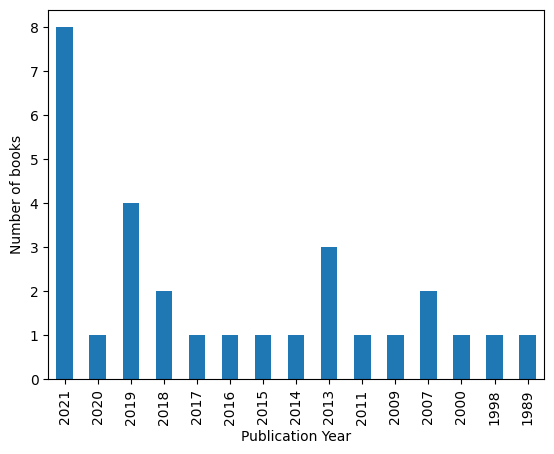

In [370]:
years = books_finished['Publication Year'].value_counts()
years = years.sort_index(ascending=False)
print(years)
years.plot(kind='bar',xlabel='Publication Year', ylabel='Number of books')

### What about the unfinished books?
What can I learn from the unfinished books on the list? Was I more likely to not finish a physical book than an audiobook, for example? Was the a genre that was more likely to go unfinished?

In [235]:
books_unfinished = books[books['Finished'] != 'Y']
print(books_unfinished.to_string())

                              Title            Author(s) Finished  Publication Year Original Language     Format     Genre 1        Genre 2                    Subject(s)
29  Stories of Your Life and Others           Ted Chiang        N              1998           English  Audiobook     Fiction         Sci-Fi                           NaN
30          Finding the Mother Tree       Suzanne Simard        N              2021           English  Audiobook  Nonfiction         Memoir               Nature, Science
31                 The Dispossessed     Ursula K. LeGuin        N              1974           English  Audiobook     Fiction         Sci-Fi                           NaN
32         The Hidden Life of Trees      Peter Wohlleben        N              2015            German  Audiobook  Nonfiction         Nature                         Trees
33            Keith Haring Journals         Keith Haring        N              2010           English       Book  Nonfiction         Memoir           

First I will look at the difference between audiobooks and physical books in the unfinished books subset. It is almost even, so I don't think that was much of a factor.

In [374]:
# Count the number of each value in the Format column
books_unfinished['Format'].value_counts()

Audiobook    8
Book         6
Name: Format, dtype: int64

Looking at the list, I can safely say that the feature shared by most of the unfinished books is that they were borrowed from the library (both audiobooks and physical books). Because I tend to borrow too many books at a time, and because library books (including audiobooks) have due dates, I simply ran out of time and haven't been able to get the books again. None of that, however, is clear from the data that I recorded in the spreadsheet.

## What the data can't tell me
This is, after all, a list of books. Behind this table are the subjective experiences of reading words, of learning about new ideas, imagining characters, being surprised or amazed or annoyed. This data can't show that I read You Are a Badass at Making Money and 1: found the author's Ayn Rand-influenced perspective offputting, and 2: failed to manifest a fortune and retire before the age of 40 (yet). The data does not show that the only reason I read at least two of the books in the list (The Girl on the Train, What I Talk About When I Talk About Running) was that I found them on a free book cart outside my former office, and later wanted something not too difficult to read before going to sleep. It does not show that I really do want to finish Lincoln in the Bardo, but I borrowed it from the library and had to return it before reaching the end. It can't show how impressed I was by Carolyn Forche's haunting memoir of her time in El Salvador, What You Have Heard is True.

There are also a number of things the data could have told me if I had set up the data structure differently at the start. I could have tracked when I started and finished each book and found the average time it took to read/listen (and if that was different for physical books and audiobooks). I could have created a value scale and rated each book. I could have included author gender to see if I'm reading an imbalance of male authors.